# Análise - Globo Esporte Olimpiadas

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
module_path2 = os.path.abspath(os.path.join('../../AxolotlDataScience'))

if module_path not in sys.path:
    sys.path.append(module_path)
    sys.path.append(module_path2)

from DataManagement import DataHandler as dataManipulation
from DataVisualization import TypeOfAccessBarChart
from Graphics import MultipleColumnsBarChartByClass
from Graphics import SingleColumnBarChartByClass
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dt = dataManipulation.DataHandler('../input_data/ge_mes_olimpiadas.csv')
data_frame = dt.get_data_frame()

Visão Geral
=============

Antes de mais nada precisamos ter uma visão geral dos dados para nos dar uma ideia geral dos dados e nos dar base para comparações no decorrer do kernel, para isso irei coletar informações gerais de alguns aspectos da base de dados. Sendo elas:

+ Média de páginas visitadas por visita
+ Média de visitas por dia
+ Média de tempo gasto por página
+ Média de tempo gasto por acesso
+ Média de tempo gasto por dia
+ Média de tempo gasto em página home


+ Tempo médio gasto nas páginas de esporte em geral
+ Tempo médio gasto nas páginas de modalidades olímpicas
+ Quantidade de assinantes
+ Quantidade de jogadores Cartola
+ Quantidade de assinantes Cartola
+ Porcentagem do tempo acessado do desktop e do mobile

╒═════════════════════════════════════╤════════════╕
│ Tipo                                │      Média │
╞═════════════════════════════════════╪════════════╡
│ páginas por visita                  │    2.85815 │
├─────────────────────────────────────┼────────────┤
│ visitas por dia                     │    1.61505 │
├─────────────────────────────────────┼────────────┤
│ Média do tempo gasto por página     │  205.025   │
├─────────────────────────────────────┼────────────┤
│ Média do tempo gasto por visita     │  628.435   │
├─────────────────────────────────────┼────────────┤
│ Média do tempo gasto por dia        │ 1018.31    │
├─────────────────────────────────────┼────────────┤
│ Média do tempo gasto em pagina home │ 2440.22    │
╘═════════════════════════════════════╧════════════╛


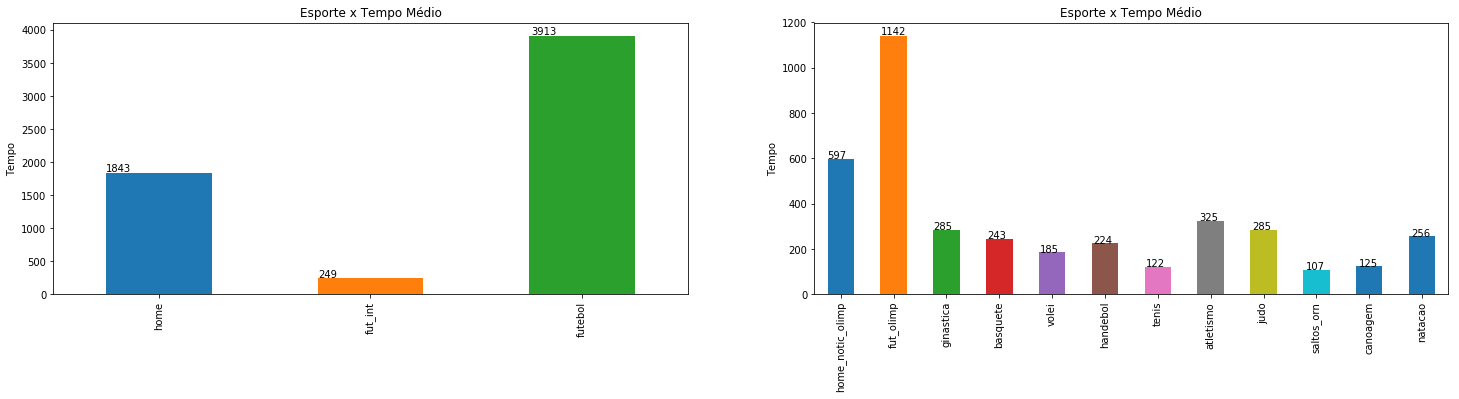

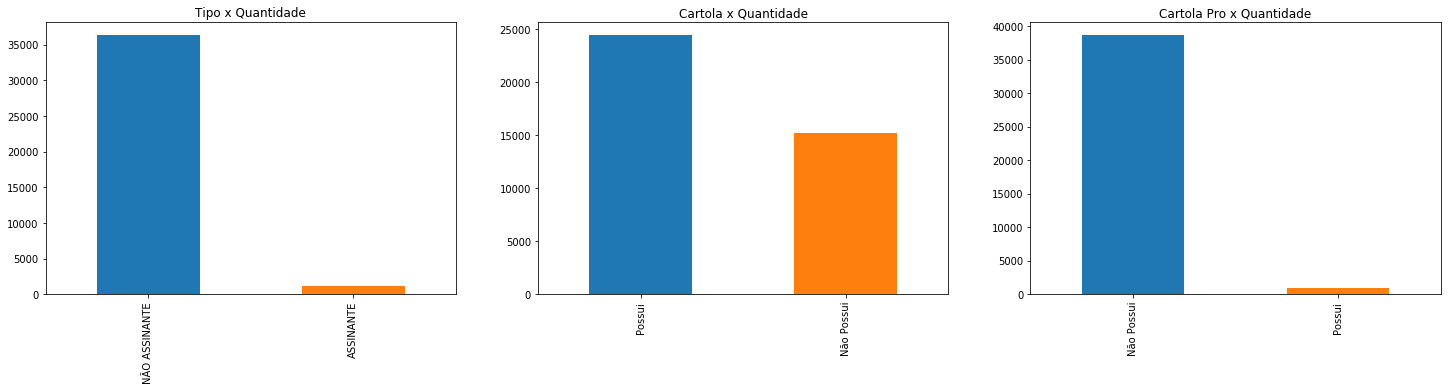

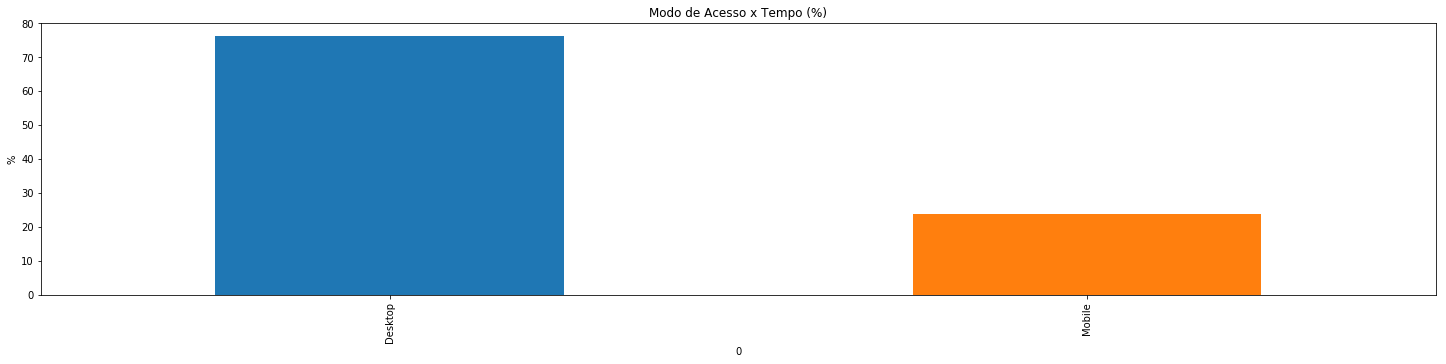

In [2]:
df_visit = data_frame[data_frame['visitas'] > 0]
df_days = data_frame[data_frame['dias'] > 0]
df_pviews = data_frame[data_frame['pviews'] > 0]

access_info = {}

access_info['páginas por visita'] = (df_visit['pviews']/df_visit['visitas']).mean()
access_info['visitas por dia'] = (df_days['visitas']/df_days['dias']).mean()
access_info['Média do tempo gasto por página'] = (df_pviews['tempo_total']/df_pviews['pviews']).mean()
access_info['Média do tempo gasto por visita'] = (df_visit['tempo_total']/df_visit['visitas']).mean()
access_info['Média do tempo gasto por dia'] = (df_days['tempo_total']/df_days['dias']).mean()
access_info['Média do tempo gasto em pagina home'] = ((data_frame['home_notic_olimp'] + data_frame['home'])).mean()

df_access = pd.DataFrame(list(access_info.items()))

time_spent_in_sports = data_frame[['home', 'fut_int', 'futebol']].mean()
time_spent_in_olympics = data_frame[['home_notic_olimp', 'fut_olimp', 'ginastica', 'basquete', 'volei', 'handebol', 'tenis', 'atletismo', 'judo', 'saltos_orn', 'canoagem', 'natacao']].mean()

plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = time_spent_in_sports.plot(kind='bar', x=0, y=1, figsize=(25, 5), ax=axes[0], title='Esporte x Tempo Médio')
ax.set_ylabel("Tempo")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax = time_spent_in_olympics.plot(kind='bar', x=0, y=1, figsize=(25, 5), ax=axes[1], title='Esporte x Tempo Médio')
ax.set_ylabel("Tempo")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

fig, axes = plt.subplots(nrows=1, ncols=3)

data_frame['cartola'] = data_frame['cartola'].map({0: 'Não Possui', 1: 'Possui'})
data_frame['cartola_pro'] = data_frame['cartola_pro'].map({0: 'Não Possui', 1: 'Possui'})

data_frame['tipo'].value_counts().plot(kind='bar', figsize=(25, 5), ax=axes[0], title='Tipo x Quantidade')
data_frame['cartola'].value_counts().plot(kind='bar', figsize=(25, 5), ax=axes[1], title='Cartola x Quantidade')
data_frame['cartola_pro'].value_counts().plot(kind='bar', figsize=(25, 5), ax=axes[2], title='Cartola Pro x Quantidade')

time_spent_percentage_dict= {}
total_time_spent = data_frame['tempo_total'].sum()
time_spent_percentage_dict['Desktop'] = 100 * data_frame['tempo_total_desktop'].sum() / total_time_spent
time_spent_percentage_dict['Mobile'] = 100 * data_frame['tempo_total_mobile'].sum() / total_time_spent

df_time = pd.DataFrame(list(time_spent_percentage_dict.items()))

ax = df_time.plot(kind='bar', x=0, y=1, figsize=(25, 5), title='Modo de Acesso x Tempo (%)', legend=False)
ax.set_ylabel("%")

print(tabulate(df_access, tablefmt='fancy_grid', showindex=False, headers=['Tipo', 'Média']))

Com isso podemos tirar algumas conclusões:

+ Os usuários passam um tempo significativo nas páginas de home, o que pode ser devido a 2 fatores:
  + A página de home possui todas as infomações que o usuário precisa
  + O usuário demora a achar a informação desejada na home
+ O cartola possui um público significativo entre os usuários
+ O futebol nacional continuou sendo o centro das atenções, mesmo em período de olimpiadas
+ Os usuários de desktop são a maioria em relação a tempo de uso no globo esporte

Modo de Acesso
===============

Na seção anterior observamos o padrão de visitas de página, tempo gasto nas páginas, entre outras métricas em relação a toda a base de dados, porém temos 2 fontes de acesso, desktop e mobile, nesta seção iremos explorar a diferença de conexão entre essas 2 formas de acesso, e compara-las com a média geral.

Primeiramente precisamos identificar quem é o usuário desktop e o usuário mobile. Afinal queremos entender como os usuários de cada um deles se comportam, uma vez que um usuário não utiliza, ou utiliza muito pouco o desktop ele só irá causar ruído quando analisarmos os dados dos usuários de desktop, pensando nisto criei 3 grupos de usuários:

+ Mobile - utilizam o mobile 70% do tempo ou mais
+ Desktop - utilizam o desktop 70 % do tempo ou mais
+ Both - utilizam o Mobile e Desktop em tempo similar

TypeError: '<' not supported between instances of 'str' and 'float'

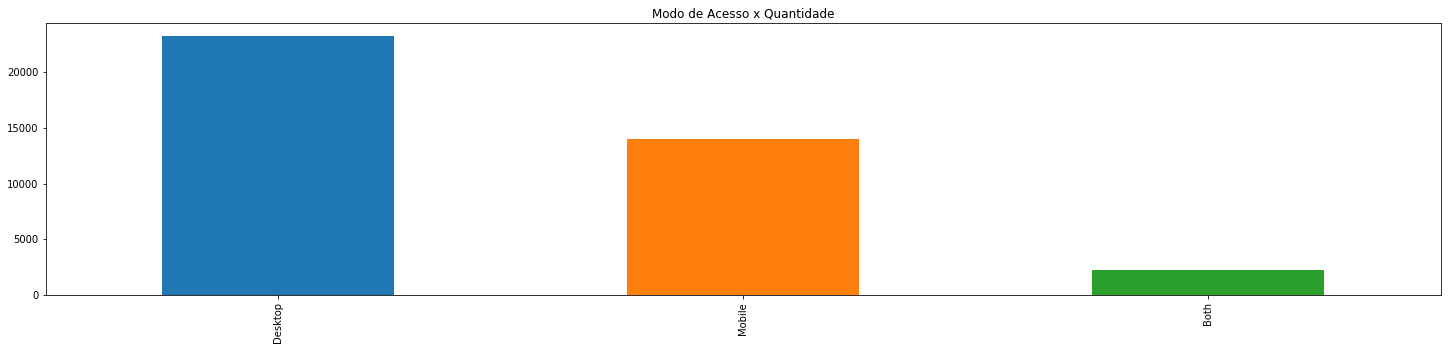

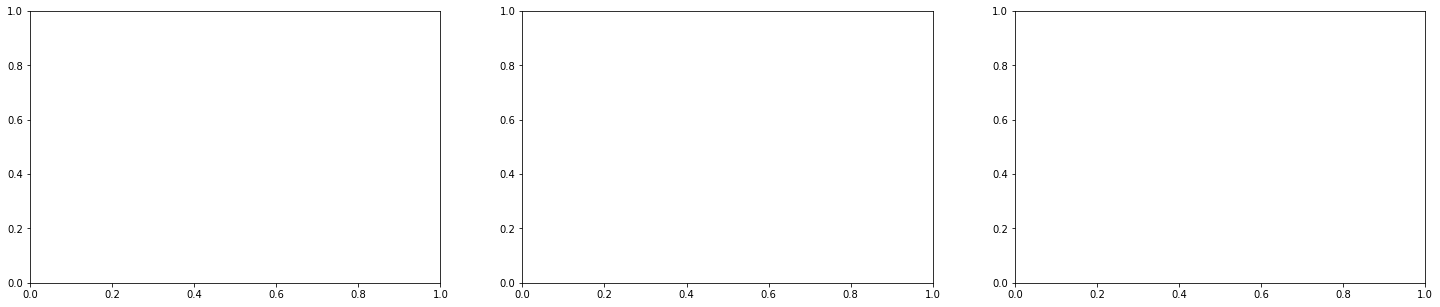

In [4]:
dt.time_to_percentage(['tempo_total_desktop', 'tempo_total_mobile'])\
  .define_desktop_and_cellphone_users()
    
time_spent_percentage_dict = {}

total_time_spent = data_frame['tempo_total'].sum()   
data_frame['device_preference'].value_counts().plot(kind='bar', figsize=(25, 5), title='Modo de Acesso x Quantidade')



Mobile
---------

╒═════════════════════════════════════╤════════════╤══════════════════╕
│ Tipo                                │      Média │   Comparação (%) │
╞═════════════════════════════════════╪════════════╪══════════════════╡
│ páginas por visita                  │    2.0514  │        -28.2264  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ visitas por dia                     │    1.59335 │         -1.34378 │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto por página     │  132.639   │        -35.3062  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto por visita     │  300.574   │        -52.171   │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto por dia        │  513.708   │        -49.5531  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto em página home │ 1484.29    │        -39.

Text(0,0.5,'%')

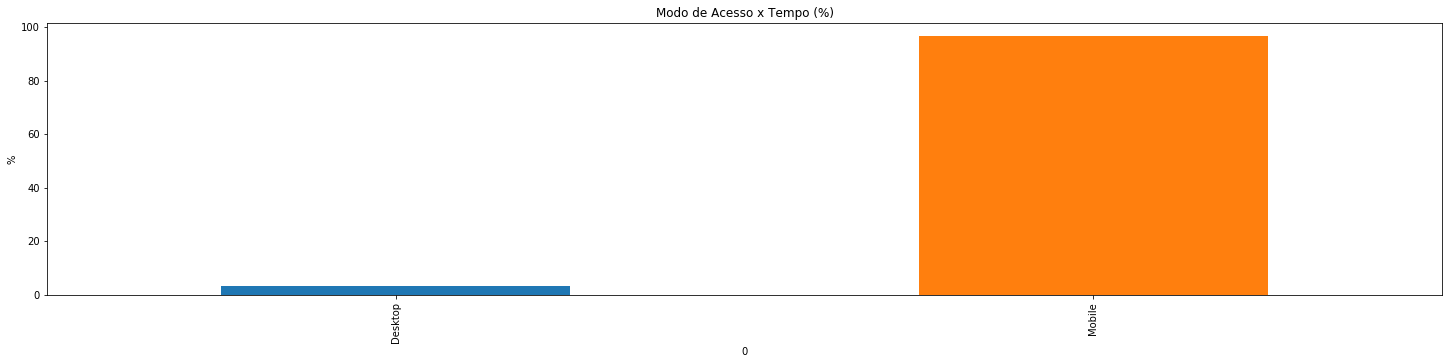

In [4]:
df_mobile = data_frame[data_frame['device_preference'].isin(['Mobile'])]

df_visit = df_mobile[df_mobile['visitas_mobile'] > 0]
df_days = df_mobile[df_mobile['dias_mobile'] > 0]
df_pviews = df_mobile[df_mobile['pviews_mobile'] > 0]

access_info_mobile = {}
access_info_mobile['páginas por visita'] = (df_visit['pviews_mobile']/df_visit['visitas_mobile']).mean()
access_info_mobile['visitas por dia'] = (df_days['visitas_mobile']/df_days['dias_mobile']).mean()
access_info_mobile['Média do tempo gasto por página'] = (df_pviews['tempo_total_mobile']/df_pviews['pviews_mobile']).mean()
access_info_mobile['Média do tempo gasto por visita'] = (df_visit['tempo_total_mobile']/df_visit['visitas_mobile']).mean()
access_info_mobile['Média do tempo gasto por dia'] = (df_days['tempo_total_mobile']/df_days['dias_mobile']).mean()
access_info_mobile['Média do tempo gasto em página home'] = ((df_mobile['home_notic_olimp'] + df_mobile['home'])).mean()

df_access_mobile = pd.DataFrame(list(access_info_mobile.items()))

df_access_mobile['Comparação'] = ((df_access_mobile[1] - df_access[1]) / df_access[1]) * 100

print(tabulate(df_access_mobile, tablefmt='fancy_grid', showindex=False, headers=['Tipo', 'Média', 'Comparação (%)']))

total_time_spent = df_mobile['tempo_total'].sum()
time_spent_percentage_dict['Desktop'] = 100 * df_mobile['tempo_total_desktop'].sum() / total_time_spent
time_spent_percentage_dict['Mobile'] = 100 * df_mobile['tempo_total_mobile'].sum() / total_time_spent

df_time = pd.DataFrame(list(time_spent_percentage_dict.items()))

ax = df_time.plot(kind='bar', x=0, y=1, figsize=(25, 5), title='Modo de Acesso x Tempo (%)', legend=False)
ax.set_ylabel("%")

Desktop
--------

╒═════════════════════════════════════╤════════════╤══════════════════╕
│ Tipo                                │      Média │   Comparação (%) │
╞═════════════════════════════════════╪════════════╪══════════════════╡
│ páginas por visita                  │    3.52523 │         23.3397  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ visitas por dia                     │    1.56883 │         -2.86168 │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto por página     │  271.359   │         32.3539  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto por visita     │  928.157   │         47.6934  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto por dia        │ 1428.61    │         40.2918  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto em página home │ 2964.34    │         21.

Text(0,0.5,'%')

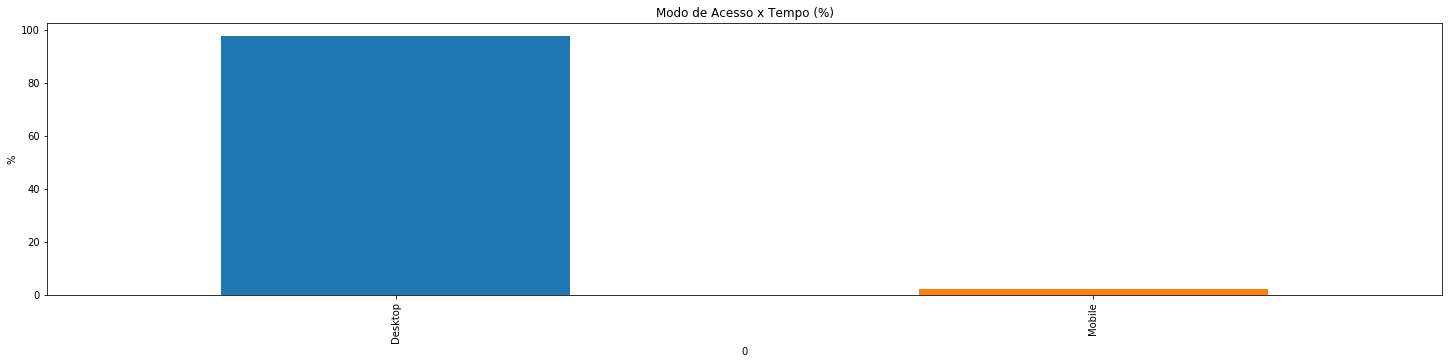

In [5]:
df_desktop = data_frame[data_frame['device_preference'].isin(['Desktop'])]

df_visit = df_desktop[df_desktop['visitas_desktop'] > 0]
df_days = df_desktop[df_desktop['dias_desktop'] > 0]
df_pviews = df_desktop[df_desktop['pviews_desktop'] > 0]

access_info_desktop = {}
access_info_desktop['páginas por visita'] = (df_visit['pviews_desktop']/df_visit['visitas_desktop']).mean()
access_info_desktop['visitas por dia'] = (df_days['visitas_desktop']/df_days['dias_desktop']).mean()
access_info_desktop['Média do tempo gasto por página'] = (df_pviews['tempo_total_desktop']/df_pviews['pviews_desktop']).mean()
access_info_desktop['Média do tempo gasto por visita'] = (df_visit['tempo_total_desktop']/df_visit['visitas_desktop']).mean()
access_info_desktop['Média do tempo gasto por dia'] = (df_days['tempo_total_desktop']/df_days['dias_desktop']).mean()
access_info_desktop['Média do tempo gasto em página home'] = ((df_desktop['home_notic_olimp'] + df_desktop['home'])).mean()

df_access_desktop = pd.DataFrame(list(access_info_desktop.items()))

df_access_desktop['Comparação'] = ((df_access_desktop[1] - df_access[1]) / df_access[1]) * 100

print(tabulate(df_access_desktop, tablefmt='fancy_grid', showindex=False, headers=['Tipo', 'Média', 'Comparação (%)']))

total_time_spent = df_desktop['tempo_total'].sum()
time_spent_percentage_dict['Desktop'] = 100 * df_desktop['tempo_total_desktop'].sum() / total_time_spent
time_spent_percentage_dict['Mobile'] = 100 * df_desktop['tempo_total_mobile'].sum() / total_time_spent

df_time = pd.DataFrame(list(time_spent_percentage_dict.items()))

ax = df_time.plot(kind='bar', x=0, y=1, figsize=(25, 5), title='Modo de Acesso x Tempo (%)', legend=False)
ax.set_ylabel("%")

Ambos
------

╒═════════════════════════════════════╤════════════╤══════════════════╕
│ Tipo                                │      Média │   Comparação (%) │
╞═════════════════════════════════════╪════════════╪══════════════════╡
│ páginas por visita                  │    2.04394 │        -28.4871  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ visitas por dia                     │    1.59539 │         -1.21772 │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto por página     │  125.995   │        -38.5468  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto por visita     │  287.832   │        -54.1986  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto por dia        │  512.526   │        -49.6692  │
├─────────────────────────────────────┼────────────┼──────────────────┤
│ Média do tempo gasto em página home │ 2980.61    │         22.

Text(0,0.5,'%')

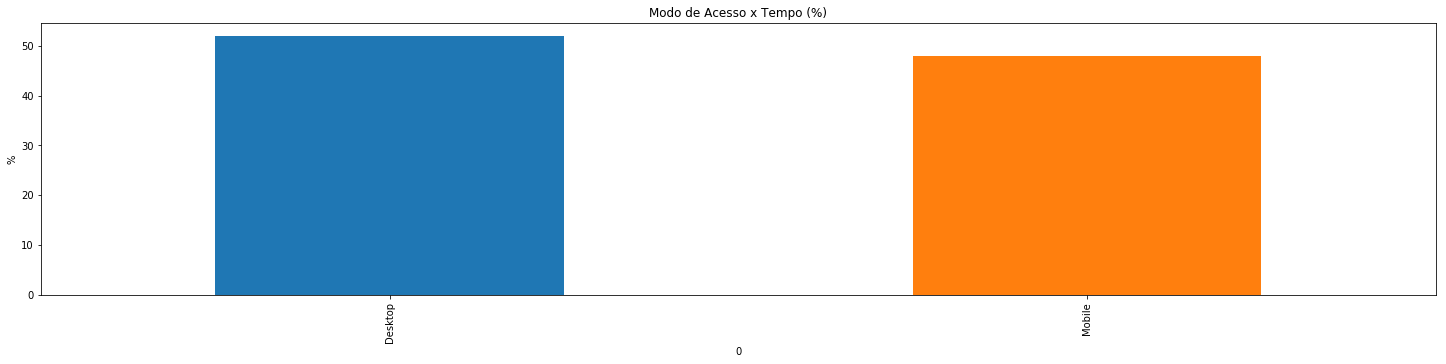

In [6]:
df_mobile = data_frame[data_frame['device_preference'].isin(['Both'])]

df_visit = df_mobile[df_mobile['visitas_mobile'] > 0]
df_days = df_mobile[df_mobile['dias_mobile'] > 0]
df_pviews = df_mobile[df_mobile['pviews_mobile'] > 0]

access_info_mobile = {}
access_info_mobile['páginas por visita'] = (df_visit['pviews_mobile']/df_visit['visitas_mobile']).mean()
access_info_mobile['visitas por dia'] = (df_days['visitas_mobile']/df_days['dias_mobile']).mean()
access_info_mobile['Média do tempo gasto por página'] = (df_pviews['tempo_total_mobile']/df_pviews['pviews_mobile']).mean()
access_info_mobile['Média do tempo gasto por visita'] = (df_visit['tempo_total_mobile']/df_visit['visitas_mobile']).mean()
access_info_mobile['Média do tempo gasto por dia'] = (df_days['tempo_total_mobile']/df_days['dias_mobile']).mean()
access_info_mobile['Média do tempo gasto em página home'] = ((df_mobile['home_notic_olimp'] + df_mobile['home'])).mean()

df_access_mobile = pd.DataFrame(list(access_info_mobile.items()))

df_access_mobile['Comparação'] = ((df_access_mobile[1] - df_access[1]) / df_access[1]) * 100

print(tabulate(df_access_mobile, tablefmt='fancy_grid', showindex=False, headers=['Tipo', 'Média', 'Comparação (%)']))

total_time_spent = df_mobile['tempo_total'].sum()
time_spent_percentage_dict['Desktop'] = 100 * df_mobile['tempo_total_desktop'].sum() / total_time_spent
time_spent_percentage_dict['Mobile'] = 100 * df_mobile['tempo_total_mobile'].sum() / total_time_spent

df_time = pd.DataFrame(list(time_spent_percentage_dict.items()))

ax = df_time.plot(kind='bar', x=0, y=1, figsize=(25, 5), title='Modo de Acesso x Tempo (%)', legend=False)
ax.set_ylabel("%")

Desktop x Mobile
-----------------

Podemos notar algumas coisas interessantes, o usuário do Desktop utiliza o globo esporte por mais tempo, como visto anteriormente, e este usuário realmente é o mais engajado com o site, como podemos ver pelas tabelas acima.

O interessante é quando analisamos o tempo que cada usuário gasta na página de home, o usuário Mobile fica 40% a menos que a média nas páginas de home, o que indica que ele foi direto para as notícias por outro meio, redes sociais, ferramentas de pesquisa, ou seja, não utilizou a home para achar a notícia desejada.

Já nos usuários que utilizam ambas tecnologias podemos ver que ele segue o padrão do usuário mobile, exceto quanto a home, já que eles a utilizam 22% a mais que a média normal, provavelmente estes acessos se dêem de um desktop, visto que, mesmo que por pouco, ainda é o meio preferido desse tipo de usuário.

Também é interessante citar que apesar de tudo os usuários visitam o globo esporte em média 1.5 vezes por dia, mas o usuário do desktop gasta mais tempo no globo esporte do que o usuário mobile.

Usuários
=========

Agora precisamos entender quem são os usuários do globo esporte em geral, para isso temos algumas informações interessantes na base de dados, sendo elas o *sexo*, a *uf*, e a *idade* de cada usuário.

Idade
------

Primeiro vamos analisar as idades dos usuários que utilizam o globo esporte, após isto veremos se a idade do usuário influência na forma de acesso, nos interesses, no uso do cartola e na assinatura ou do cartola ou da globo em si.

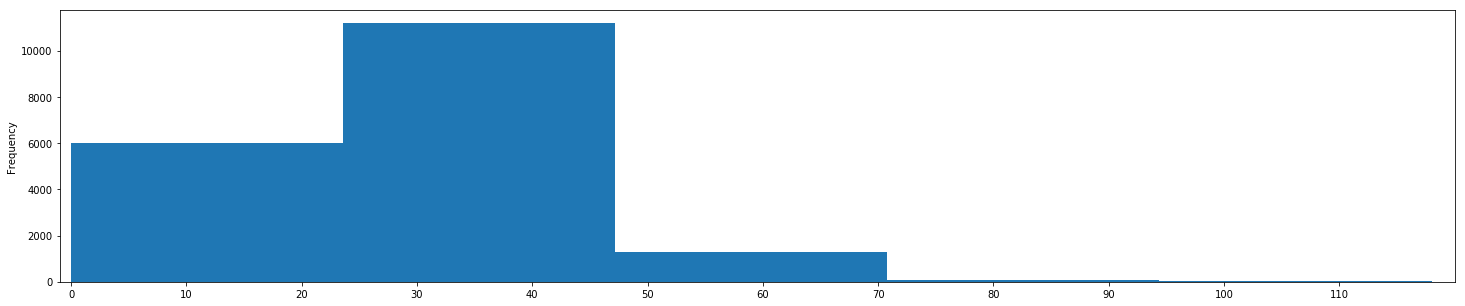

In [6]:
x_ticks = list(range(0, 120, 10))
ax = data_frame['idade'].plot(kind='hist', xlim=[-1, 120], figsize=(25, 5), xticks=x_ticks)
plt.show()

Podemos observar que a maioria dos usuários se encontra entre 23 e 48 anos, seguidos pelos que tem até 23 anos e por fim os que tem mais de 48 anos.

Por estes intervalos serem grandes, englobam diferentes gerações. Farei subdivisões entre os grupos mais frequentes, de forma a diminuir a granularidade nesses grupos para as próximas analises.

#### Intervalos

+ 0 - [0, 13]
+ 1 - [13, 23]
+ 2 - [23, 35]
+ 3 - [35, 48]
+ 4 - 48+

In [7]:
age_interval = [-np.inf, 13, 23, 35, 48, np.inf]

dt.discretize_column('idade', age_interval)

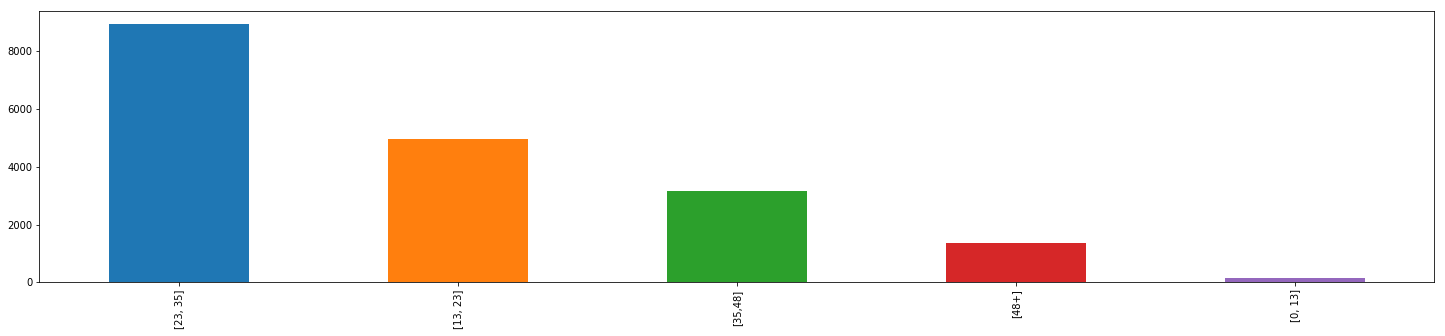

In [8]:
data_frame['idade'] = data_frame['idade'].map({0: '[0, 13]', 1: '[13, 23]', 2: '[23, 35]', 3:'[35,48]', 4:'[48+]'})

idade_without_null = data_frame.loc[data_frame['idade'].notnull()]

data_frame['idade'].value_counts().plot(kind='bar', figsize=(25, 5))

Com a nova podemos observar que a maioria dos usuários se tem de 13 a 35 anos, ao contrário do que se pensava anteriormente, pois o grupo 0 influênciou muito a primeira parte do histograma, já que o público infantil não acessa tanto o globo esporte. 

#### **Acesso**

Agora, com estes 5 grupos definidos, podemos nos fazer a seguinte pergunta:

**A idade influência o modo de acesso (mobile, desktop) ao globo esporte?**

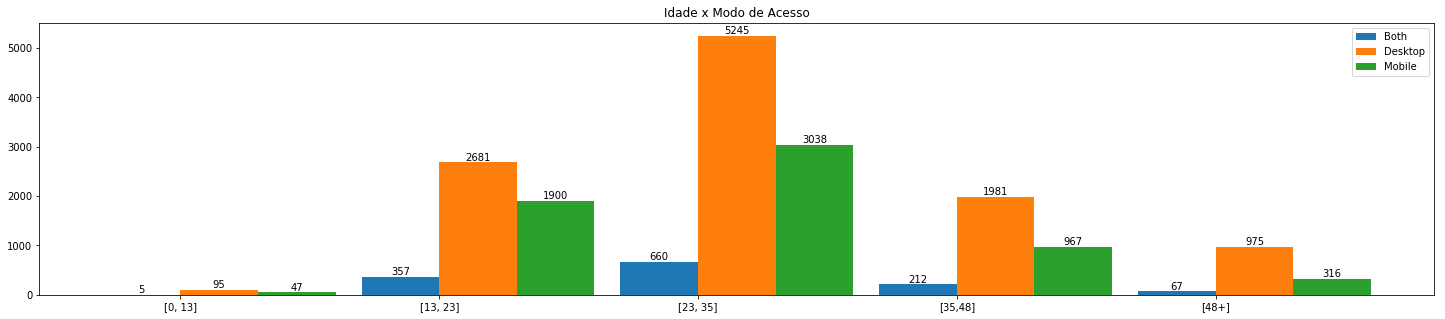

In [9]:

bar_chart = SingleColumnBarChartByClass.SingleColumnBarChartByClass(plt, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(idade_without_null.idade) \
         .set_class_values(idade_without_null.device_preference) \
         .plot_chart('Idade x Modo de Acesso', 0, 0)

Com isto podemos notar que apesar dos usuários de desktop serem maioria, a quantidade de usuários mobile já é grande, e se observarmos o gráfico acima veremos que quanto mais jovem o grupo mais estes utilizam o mobile como fonte principal de acesso.

#### **Interesses**

Agora em relação aos interesses dos usuários uma série de perguntas surgem:

+ Qual a faixa etária tem mais chances de:
  + ser um assinante?
  + participar do cartola?
  + possuir cartola-pro?
+ Qual esporte olímpico é o preferido de cada faixa etária?
+ Qual o interesse em futebol de cada faixa etária?
+ Quanto tempo cada faixa etária passa na home?

#### Planos


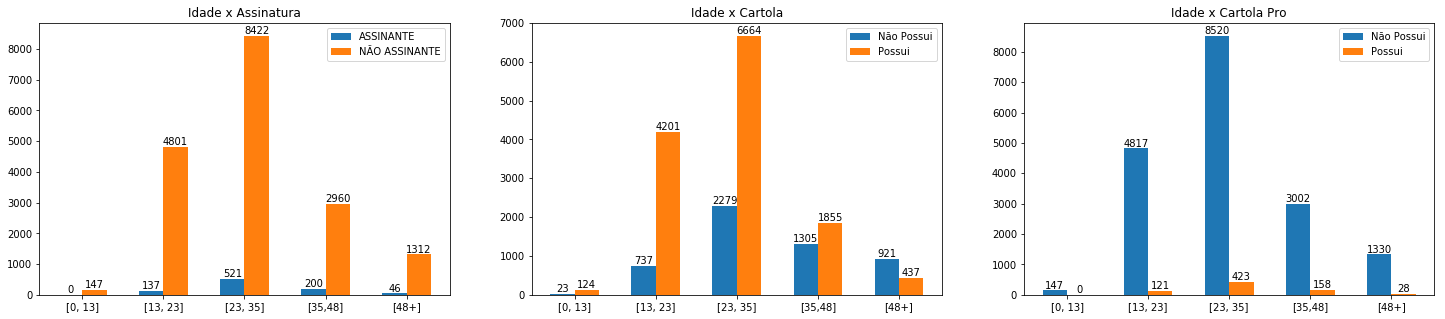

In [12]:
bar_chart = SingleColumnBarChartByClass.SingleColumnBarChartByClass(plt, rows=1, columns=3, x_size=25, y_size=5)

bar_chart.set_attribute_values(idade_without_null.idade) \
         .set_class_values(idade_without_null.tipo) \
         .plot_chart('Idade x Assinatura', 0, 0)
        
bar_chart.set_attribute_values(idade_without_null.idade) \
         .set_class_values(idade_without_null.cartola) \
         .plot_chart('Idade x Cartola', 0, 1)
        
bar_chart.set_attribute_values(idade_without_null.idade) \
         .set_class_values(idade_without_null.cartola_pro) \
         .plot_chart('Idade x Cartola Pro', 0, 2)

Podemos notar algumas coisas interessantes nesses gráficos.

* Praticamente todo o público infantil do globo esporte possui uma conta no cartola.
* Usuários entre 13 e 23 anos são percentualmente o que mais tem conta no cartola.
* Usuários entre 35 e 48 anos são é percentualmente o que mais tem cartola pro.
* Usuários com mais de 48 anos não são tão interessados no cartola quanto os demais.

#### Olímpiadas

Neste ponto queremos não somente ver qual o grupo acessa mais sobre um esporte, mas sim saber o quanto um grupo acessa em relação ao todo, tomemos por exemplo o futebol olímpico, nele temos que os usuários de 0 a 13 anos acessaram sobre o assunto por 643 minutos em média no mês, nós sabemos que este grupo foi o que menos acessou, porém o quão fora do padrão ele está?

Para analisar isto normalizei ele com a média de futebol olímpico calculada no início deste kernel, de modo que agora além de saber que este foi o grupo que menos acessou, eu sei que ele acessou cerca de 43% abaixo da média dos usuários. Desta maneira conseguimos identificar o interesse ou não de um grupo por um esporte, um exemplo claro disto é o atletismo, onde percebemos que os usuários com 48 ou mais acessaram este conteúdo 58% a mais que a média.

**Abaixo temos o gráfico completo onde é mostrado a média do número de minutos acessados, e *logo abaixo* temos o quanto acima ou abaixo da média está este número.**

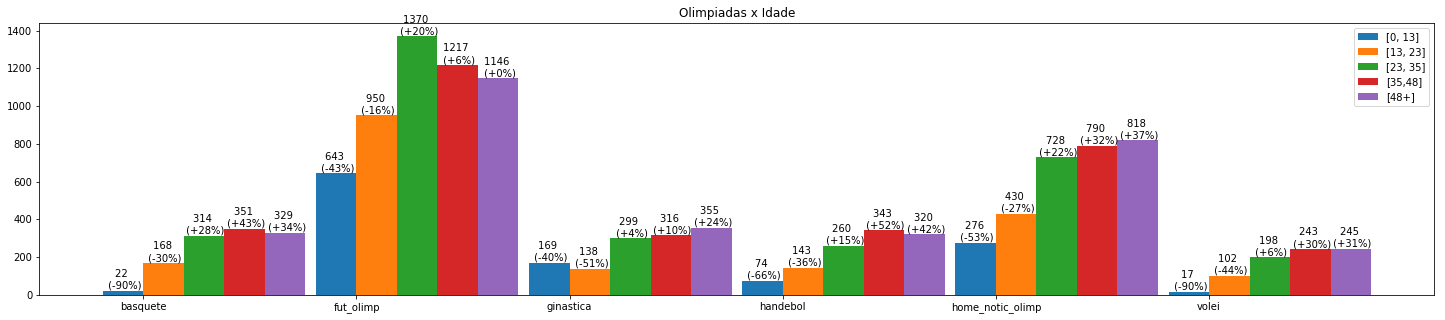

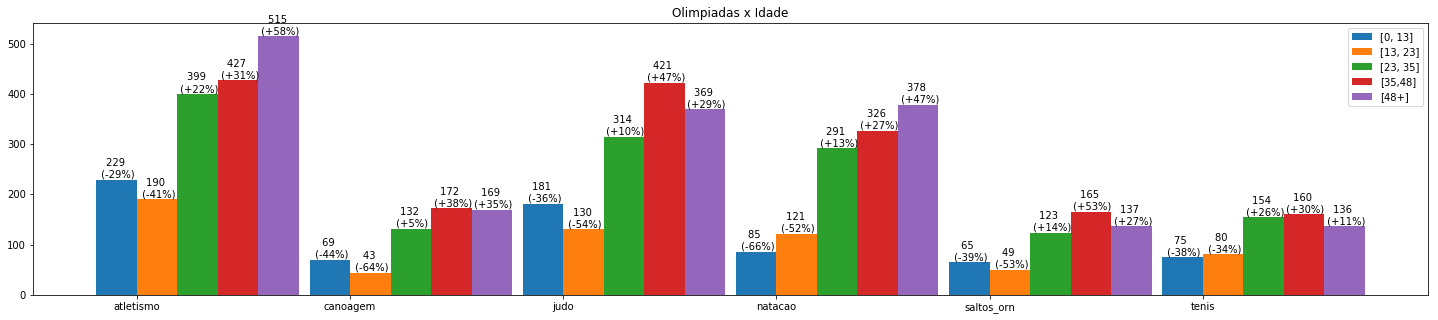

In [12]:
time_spent_in_olympics = data_frame[['home_notic_olimp', 'fut_olimp', 'ginastica', 'basquete', 'volei', 'handebol']].mean()
bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=idade_without_null, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(['home_notic_olimp', 'fut_olimp', 'ginastica', 'basquete', 'volei', 'handebol']) \
         .set_class_values(idade_without_null.idade) \
         .plot_chart('Olimpiadas x Idade', 0, 0, bar_width=0.19, column='idade', avg_values=time_spent_in_olympics)
        
time_spent_in_olympics = data_frame[['tenis', 'atletismo', 'judo', 'saltos_orn', 'canoagem', 'natacao']].mean()
bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=idade_without_null, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(['tenis', 'atletismo', 'judo', 'saltos_orn', 'canoagem', 'natacao']) \
         .set_class_values(idade_without_null.idade) \
         .plot_chart('Olimpiadas x Idade', 0, 0, bar_width=0.19, column='idade', avg_values=time_spent_in_olympics) 

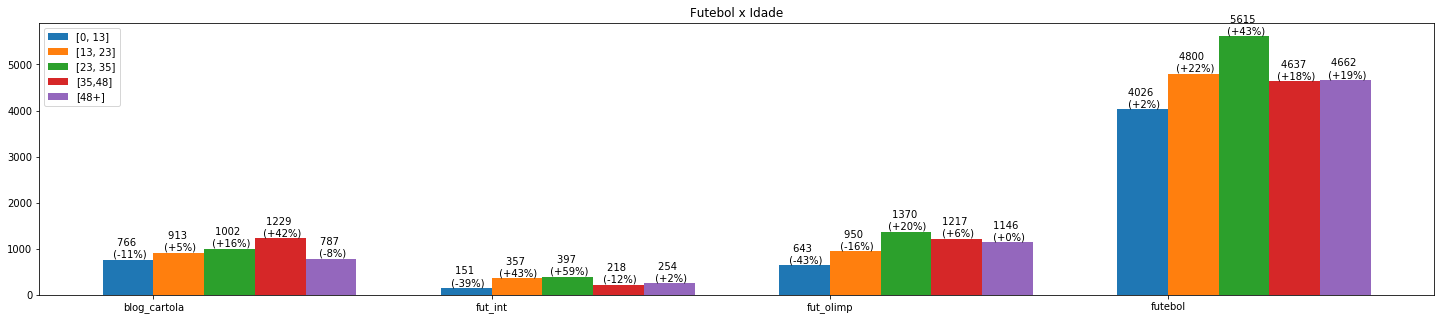

In [13]:
bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=idade_without_null, rows=1, columns=1, x_size=25, y_size=5)

time_spent_in_soccer = data_frame[['fut_olimp', 'futebol', 'fut_int', 'blog_cartola']].mean()
bar_chart.set_attribute_values(['fut_olimp', 'futebol', 'fut_int', 'blog_cartola']) \
         .set_class_values(idade_without_null.idade) \
         .plot_chart('Futebol x Idade', 0, 0, bar_width=0.15, column='idade', avg_values=time_spent_in_soccer)

Aqui nós temos um fato interessante, pelos dados de idade serem esparsos, acabamos vendo que todas as idades se interessam acima da média por futebol nacional, o que não deveria ser assim, ou seja, existe algum outro fator, fora a idade que inflência nesse interesse.

Já para o futebol internacional podemos ver um interesse maior entre os usuários que tem de 13 a 35 anos, o interessante é que esse interesse do grupo 1 (13 a 23 anos) não se manifestou nas olímpiadas.

E sobre o acesso ao blog cartola, supredeentemente os usuários de 35 a 48 são os que tem maior interesse, o que é interessante visto que mesmo no futebol nacional este grupo não teve um destaque tão grande.

#### Home

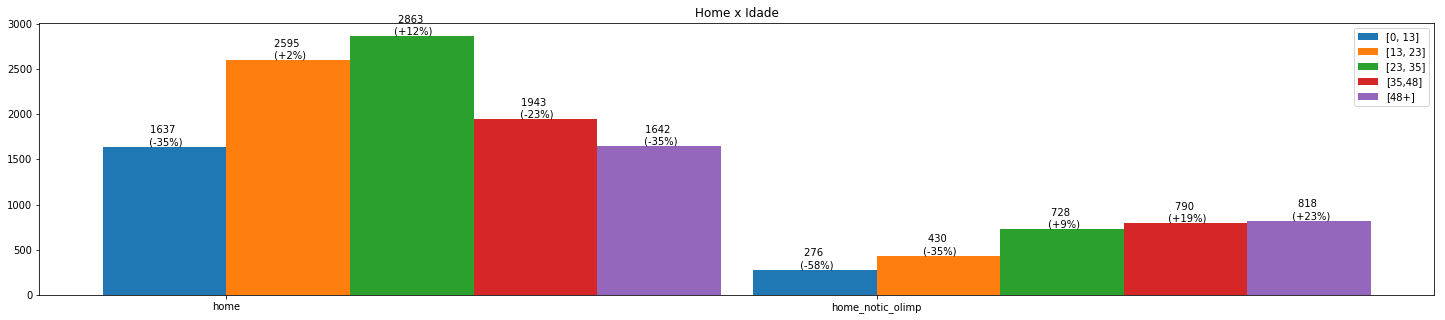

In [14]:
home_avgs = idade_without_null[['home', 'home_notic_olimp']].mean()
bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=idade_without_null, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(['home', 'home_notic_olimp']) \
         .set_class_values(idade_without_null.idade) \
         .plot_chart('Home x Idade', 0, 0, bar_width=0.19, column='idade', avg_values=home_avgs) 

Ao observar o uso da home observamos alguns pontos interessantes, a home normal, é mais utilizada pelo grupo 2. Porém nas olímpiadas as pessoas provavelmente acessaram mais a home, da olímpiada, para saber o status geral da competição, o que ocasionou o grupo 3 e 4 utilizarem mais esta página.

É importante frisar que em nenhum dos casos o grupo 1 utiliza a home com frequência, ou seja, eles vão direto para a notícia por outros meios, e seria interessante analisar como eles chegam até a notícia.

Sexo
-----

Aqui realizaremos os mesmos questionamentos realizados acima, porém agora com o foco no sexo do usuário, para ver se isto influencia de alguma forma no uso do globo esporte e como influencia.

### Informações Gerais

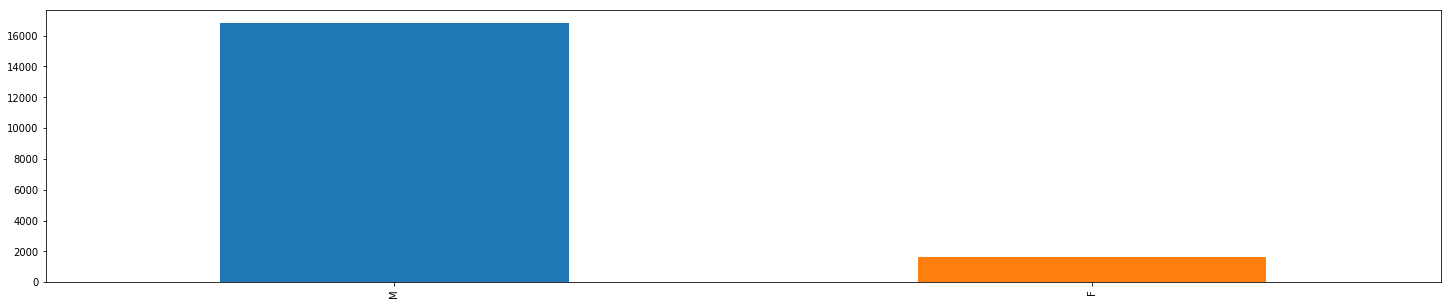

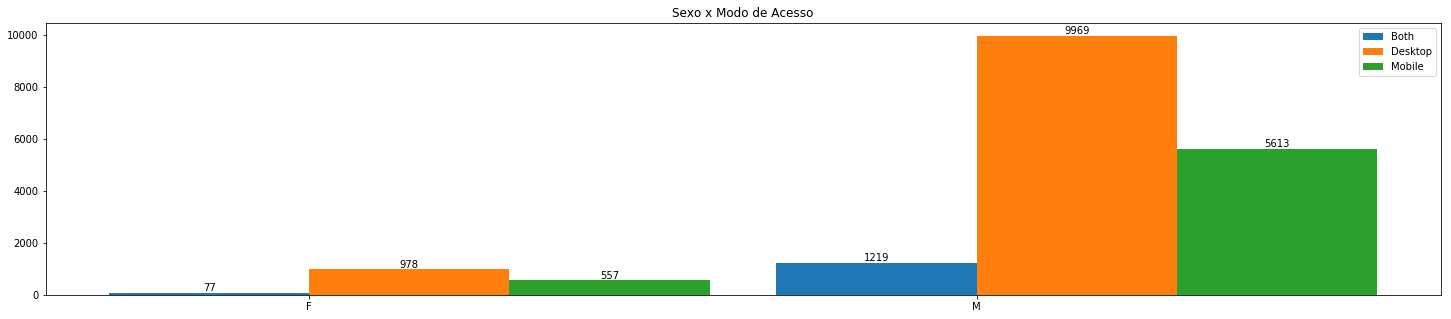

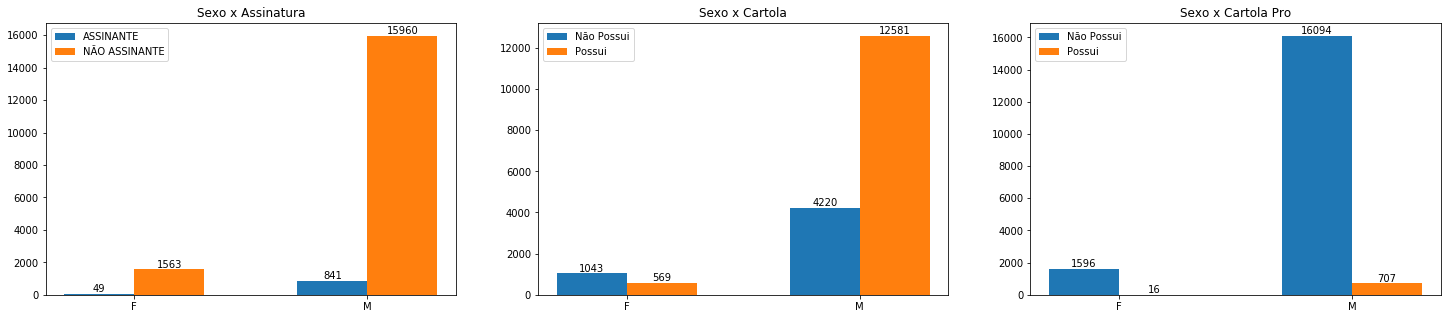

In [15]:
sex_without_null = data_frame.loc[data_frame['sexo'].notnull()]
sex_without_null['sexo'].value_counts().plot(kind='bar', figsize=(25, 5))

bar_chart = SingleColumnBarChartByClass.SingleColumnBarChartByClass(plt, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(sex_without_null.sexo) \
         .set_class_values(sex_without_null.device_preference) \
         .plot_chart('Sexo x Modo de Acesso', 0, 0)

bar_chart = SingleColumnBarChartByClass.SingleColumnBarChartByClass(plt, rows=1, columns=3, x_size=25, y_size=5)

bar_chart.set_attribute_values(sex_without_null.sexo) \
         .set_class_values(sex_without_null.tipo) \
         .plot_chart('Sexo x Assinatura', 0, 0)
        
bar_chart.set_attribute_values(sex_without_null.sexo) \
         .set_class_values(sex_without_null.cartola) \
         .plot_chart('Sexo x Cartola', 0, 1)
        
bar_chart.set_attribute_values(sex_without_null.sexo) \
         .set_class_values(sex_without_null.cartola_pro) \
         .plot_chart('Sexo x Cartola Pro', 0, 2)

É evidente que o maior público do globo esporte é masculino, também podemos observar que percentualmente o tipo de acesso é similar idependente do sexo.

Quanto a assinatura a distribuição é similar, 3% das mulheres e 5% dos homem são assinantes da globo. 

Já no cartola a diferença é bem grande apenas 35% das mulheres possuem uma conta no cartola, enquanto 75% dos homens a possuem. 

No cartola pro a proporção diminui um pouco, sendo 1% das mulheres assinantes e 4% dos homens.

### Esportes

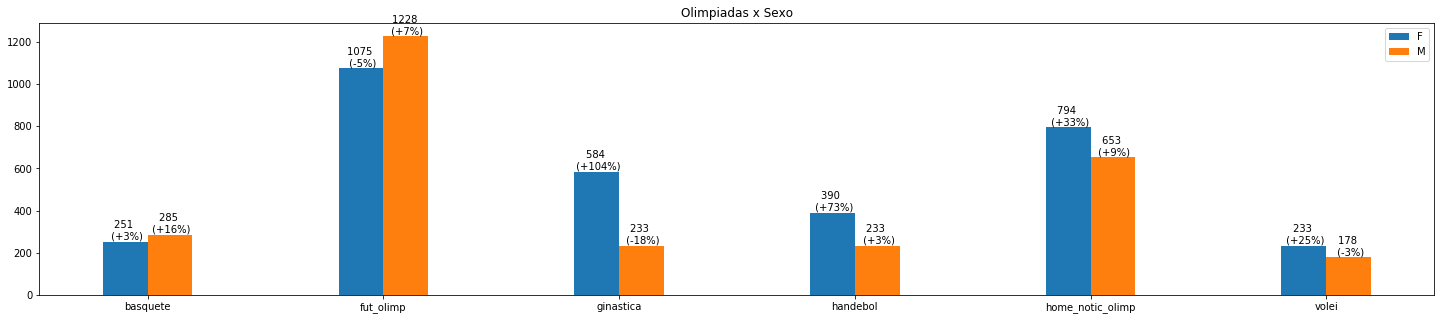

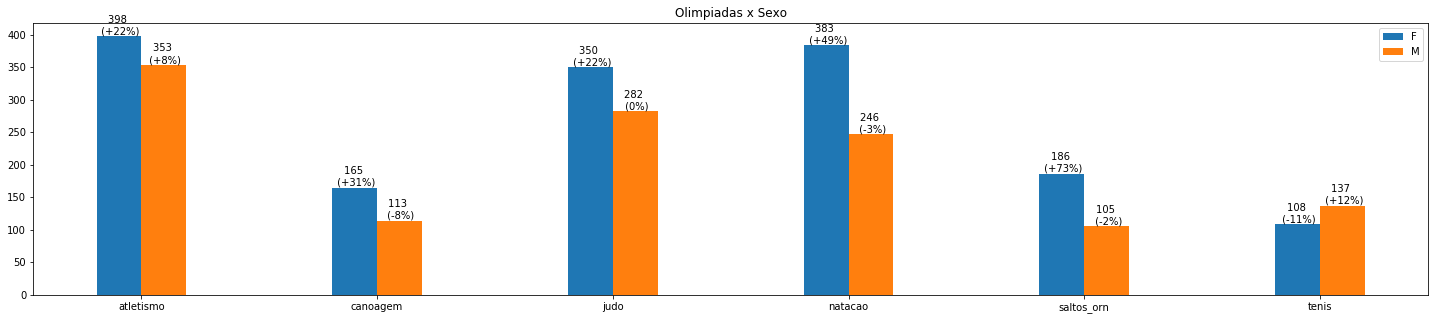

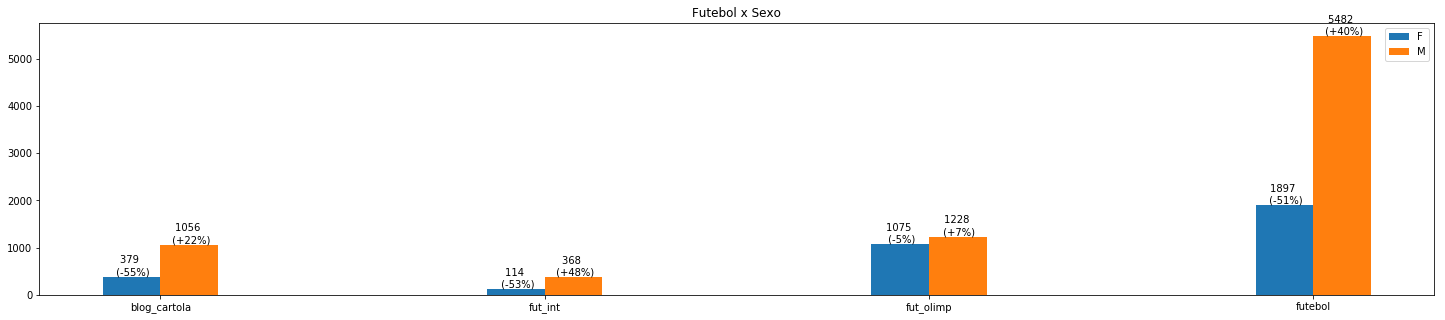

In [16]:
time_spent_in_olympics = data_frame[['home_notic_olimp', 'fut_olimp', 'ginastica', 'basquete', 'volei', 'handebol']].mean()
bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=sex_without_null, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(['home_notic_olimp', 'fut_olimp', 'ginastica', 'basquete', 'volei', 'handebol']) \
         .set_class_values(sex_without_null.sexo) \
         .plot_chart('Olimpiadas x Sexo', 0, 0, bar_width=0.19, column='sexo', avg_values=time_spent_in_olympics)
        
time_spent_in_olympics = data_frame[['tenis', 'atletismo', 'judo', 'saltos_orn', 'canoagem', 'natacao']].mean()
bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=sex_without_null, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(['tenis', 'atletismo', 'judo', 'saltos_orn', 'canoagem', 'natacao']) \
         .set_class_values(sex_without_null.sexo) \
         .plot_chart('Olimpiadas x Sexo', 0, 0, bar_width=0.19, column='sexo', avg_values=time_spent_in_olympics) 

bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=sex_without_null, rows=1, columns=1, x_size=25, y_size=5)

time_spent_in_soccer = data_frame[['fut_olimp', 'futebol', 'fut_int', 'blog_cartola']].mean()
bar_chart.set_attribute_values(['fut_olimp', 'futebol', 'fut_int', 'blog_cartola']) \
         .set_class_values(sex_without_null.sexo) \
         .plot_chart('Futebol x Sexo', 0, 0, bar_width=0.15, column='sexo', avg_values=time_spent_in_soccer)

Nas olímpiadas nós podemos observar uma presença feminina grande, maior que a masculina na grande maioria dos esportes. Porém 3 esportes principais merecem uma menção:

+ *Ginástica*: O público feminino teve interesse 104% maior que os demais (masculino e na)
+ *Saltos Ornamentais*: O público feminino teve interesse 73% maior que os demais (masculino e na)
+ *Natação*: O público feminino teve interesse 49% maior que os demais (masculino e na)

Porém quando vamos analisar futebol em geral vemos uma participação novamente bem mais masculina, somente no futebol olímpico o público feminino praticamente se igualou ao masculino, mas provavelmente mais por se tratar de um esporte olímpico do que pelo futebol em si, como podemos ver nos outros gráficos o público feminino apresenta um interesse em futebol 50% inferior ao restante.

O que explica o fato de terem poucas mulheres cadastradas no cartola.

### Home

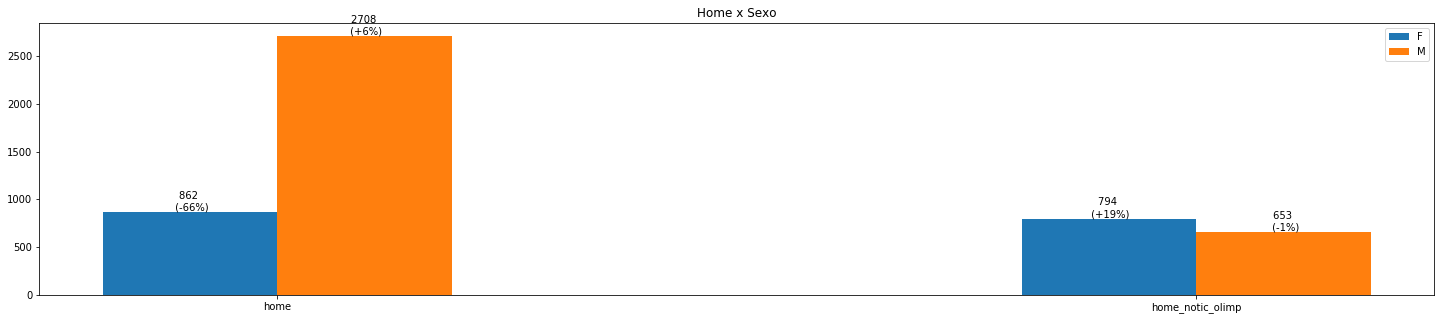

In [17]:
home_avgs = sex_without_null[['home', 'home_notic_olimp']].mean()
bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=sex_without_null, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(['home', 'home_notic_olimp']) \
         .set_class_values(sex_without_null.sexo) \
         .plot_chart('Home x Sexo', 0, 0, bar_width=0.19, column='sexo', avg_values=home_avgs) 

Podemos observar que o público feminino não se interessa muito pela home normal do globo esporte, provavelmente pelo foco em futebol que a home normal tem, como não há o interesse por futebol o interesse pela home cai significativamente.

Já na home das olímpiadas o público feminino superou a média, o que reforça que o público feminino se interessou muito mais pelo evento que o público masculino, que por pouco, mas ainda sim, ficou abaixo da média.

UF - Região
------------

In [18]:
df_uf = data_frame

df_uf['regiao'] = df_uf['uf']

sudeste = ['Sao Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Espirito Santo']
sul = ['Parana', 'Santa Catarina', 'Rio Grande do Sul']
nordeste = ['Alagoas', 'Bahia', 'Ceara', 'Maranhao', 'Paraiba', 'Pernambuco', 'Piaui', 'Rio Grande do Norte',
                    'Sergipe']
norte = ['Amapa', 'Roraima', 'Amazonas', 'Rondonia', 'Tocantins', 'Para', 'Acre']
centro_oeste = ['Distrito Federal', 'Goias', 'Mato Grosso', 'Mato Grosso do Sul']

df_uf.loc[df_uf['regiao'].isin(sudeste), 'regiao'] = 'sudeste'
df_uf.loc[df_uf['regiao'].isin(sul), 'regiao'] = 'sul'
df_uf.loc[df_uf['regiao'].isin(nordeste), 'regiao'] = 'nordeste'
df_uf.loc[df_uf['regiao'].isin(norte), 'regiao'] = 'norte'
df_uf.loc[df_uf['regiao'].isin(centro_oeste), 'regiao'] = 'centrooeste'

df_uf = df_uf.loc[df_uf['regiao'].notnull()]

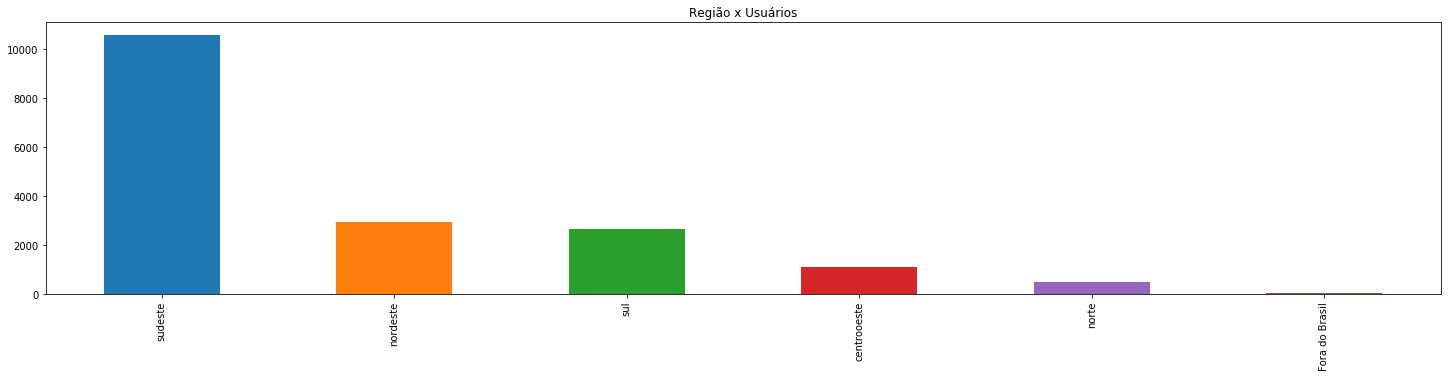

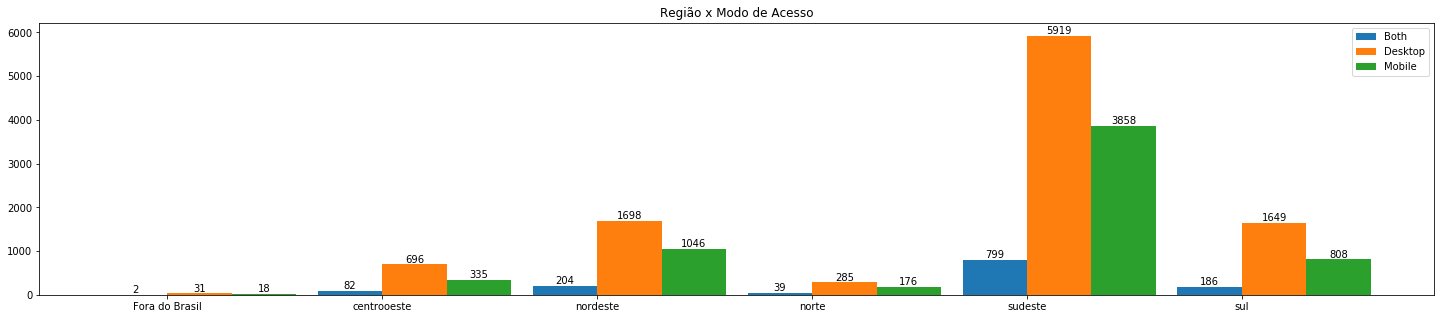

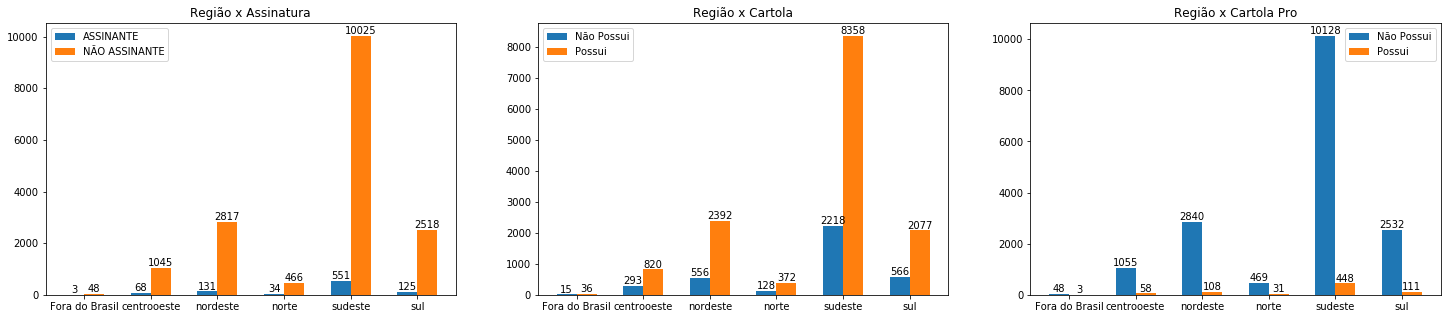

In [19]:
df_uf['regiao'].value_counts().plot(kind='bar', figsize=(25, 5), title='Região x Usuários')

plt.figure()
bar_chart = SingleColumnBarChartByClass.SingleColumnBarChartByClass(plt, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(df_uf.regiao) \
         .set_class_values(df_uf.device_preference) \
         .plot_chart('Região x Modo de Acesso', 0, 0)
        
bar_chart = SingleColumnBarChartByClass.SingleColumnBarChartByClass(plt, rows=1, columns=3, x_size=25, y_size=5)

bar_chart.set_attribute_values(df_uf.regiao) \
         .set_class_values(df_uf.tipo) \
         .plot_chart('Região x Assinatura', 0, 0)
        
bar_chart.set_attribute_values(df_uf.regiao) \
         .set_class_values(df_uf.cartola) \
         .plot_chart('Região x Cartola', 0, 1)
        
bar_chart.set_attribute_values(df_uf.regiao) \
         .set_class_values(df_uf.cartola_pro) \
         .plot_chart('Região x Cartola Pro', 0, 2)

A maior concentração de usuários está localizada no sudeste do Brasil, o que não é surpresa, já que esta é também a área mais habitada do país. 

Porém a distribuição de modo de acesso, assinatura, usuários do cartola e cartola pro são praticamente iguais independendo da região.

### Esportes

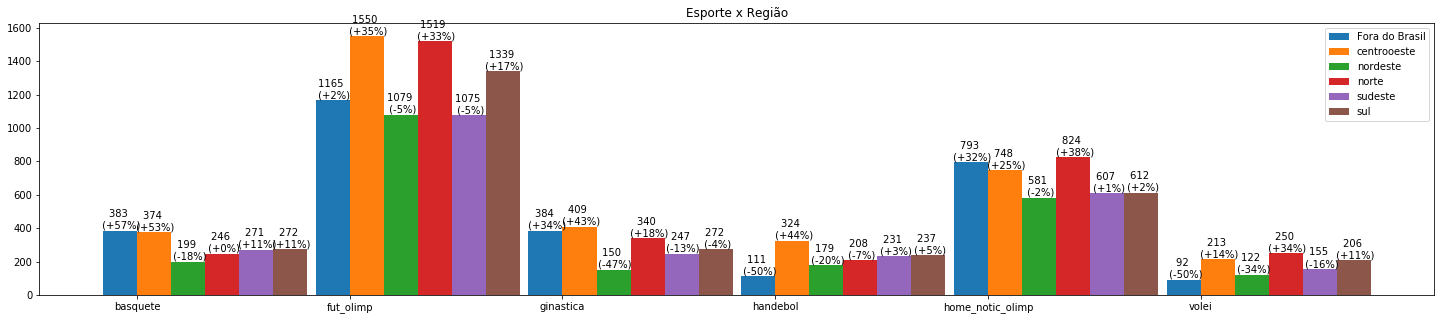

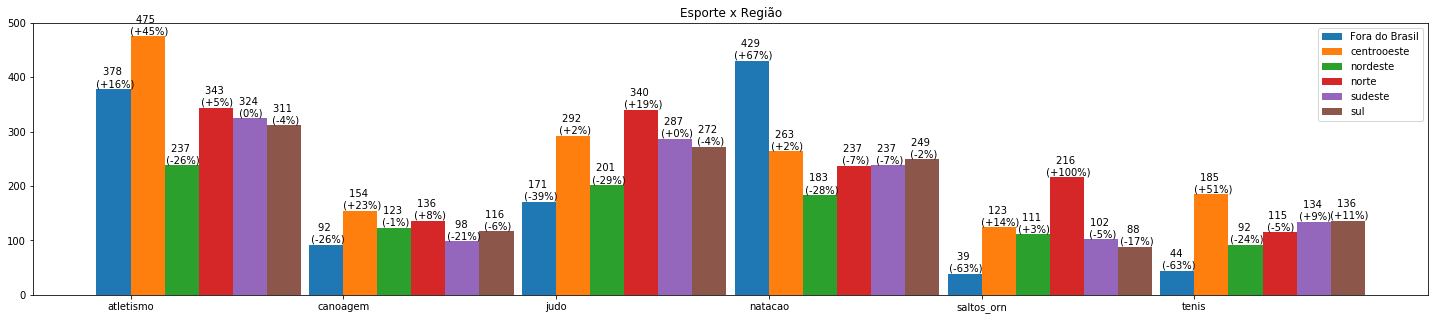

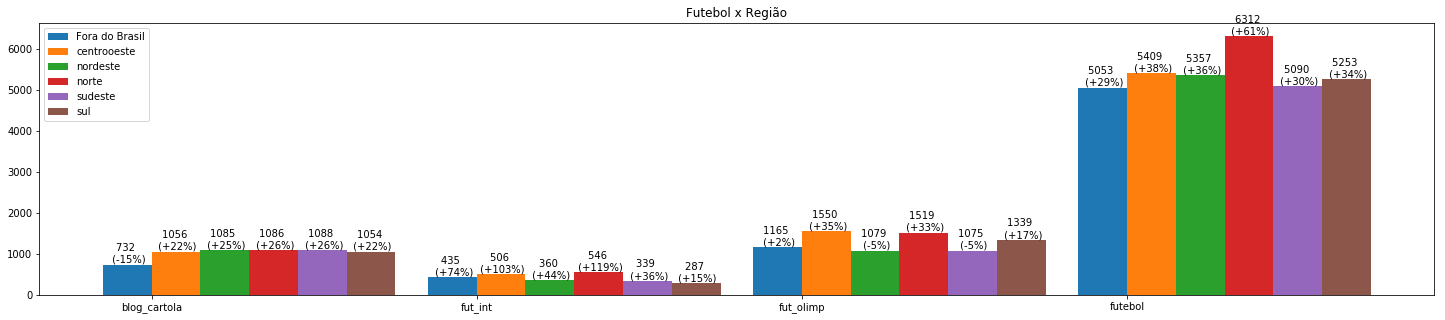

In [20]:
time_spent_in_olympics = data_frame[['home_notic_olimp', 'fut_olimp', 'ginastica', 'basquete', 'volei', 'handebol']].mean()
bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=df_uf, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(['home_notic_olimp', 'fut_olimp', 'ginastica', 'basquete', 'volei', 'handebol']) \
         .set_class_values(df_uf.regiao) \
         .plot_chart('Esporte x Região', 0, 0, bar_width=0.16, column='regiao', avg_values=time_spent_in_olympics)
        
time_spent_in_olympics = data_frame[['tenis', 'atletismo', 'judo', 'saltos_orn', 'canoagem', 'natacao']].mean()
bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=df_uf, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(['tenis', 'atletismo', 'judo', 'saltos_orn', 'canoagem', 'natacao']) \
         .set_class_values(df_uf.regiao) \
         .plot_chart('Esporte x Região', 0, 0, bar_width=0.16, column='regiao', avg_values=time_spent_in_olympics) 

bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=df_uf, rows=1, columns=1, x_size=25, y_size=5)

time_spent_in_soccer = data_frame[['fut_olimp', 'futebol', 'fut_int', 'blog_cartola']].mean()
bar_chart.set_attribute_values(['fut_olimp', 'futebol', 'fut_int', 'blog_cartola']) \
         .set_class_values(df_uf.regiao) \
         .plot_chart('Futebol x Região', 0, 0, bar_width=0.15, column='regiao', avg_values=time_spent_in_soccer)

O ponto que mais chama atenção nesses gráficos é certamente o interesse que o povo nortenho tem por saltos ornamentais, chegando a acessar o dobro do tempo que as outras regiões.

Também podemos notar que os usuários de fora do Brasil tem preferência por natação e basquete.

Outro ponto interessante é quanto ao sudeste, por ter a grande maioria dos usuários, ele tem um peso maior na média do todo, e por isso ele se mantém nos jogos olímpicos sempre por perto da média, exceto em canoagem, onde chega a ficar mais de 20% abaixo da média nacional.

Quanto ao futebol podemos notar que todos os usuários que preencheram os dados de uf são bem dedicados ao futebol, principalmente o povo do norte, que está bem acima da média nos 4 gráficos.

Sendo assim, ainda temos uma questão pra responder:

Nós sabemos que a idade não deixa ninguém abaixo da média no acesso sobre futebol nacional, tampouco a região, quanto ao sexo nós vimos que as mulheres não tem tanto interesse por futebol, mas também vimos que o público masculino é a grande maioria do público do globo esporte, sendo assim o que equilibraria esse gráfico além do sexo?

Cartola
--------

Para os usuários do cartola faremos a análise apenas em relação ao futebol, já que por definição o cartola não influencia outras modalidades além do futebol.

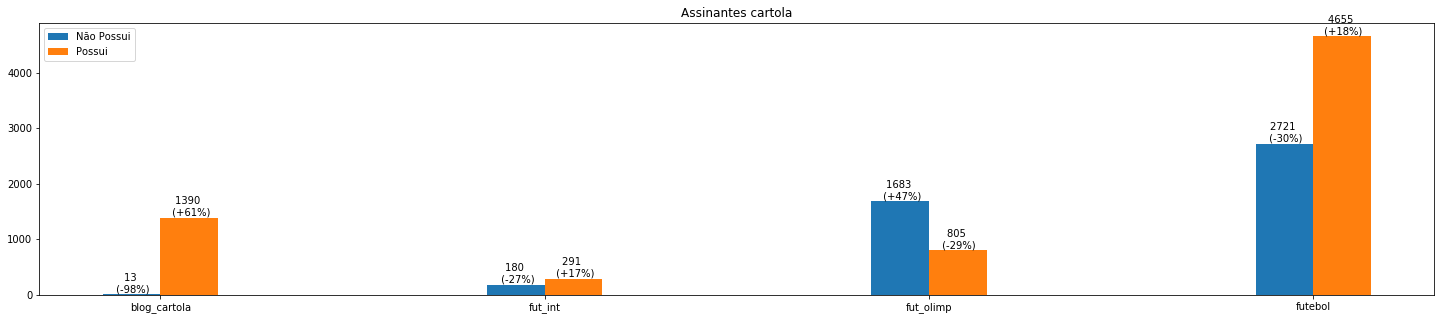

In [21]:
time_spent_in_soccer = data_frame[['fut_olimp', 'futebol', 'fut_int', 'blog_cartola']].mean()

bar_chart = MultipleColumnsBarChartByClass.MultipleColumnsBarChartByClass(plt, data_frame=data_frame, rows=1, columns=1, x_size=25, y_size=5)

bar_chart.set_attribute_values(['fut_olimp', 'futebol', 'fut_int', 'blog_cartola']) \
         .set_class_values(data_frame.cartola) \
         .plot_chart('Assinantes cartola', 0, 0, bar_width=0.15, column='cartola', avg_values=time_spent_in_soccer)

Por fim podemos entender a grande variável que influência sobre o gosto por futebol dos usuários com os dados cadastrados, os usuários que possuem cartola provavelmente são incentivados a preencher as informações de idade, uf e sexo, e por isso quando fazemos filtros por idade e região os usuários sempre estavam bem acima da média se tratando de futebol.

Isso não acontece com o público feminino, pois este, ao menos neste mês estava mais preocupado com as olímpiadas do que somente com futebol.

Churn e Recomendações
----------------------


Na base de dados do globo esporte temos 3 tipos de assinaturas, os que possuem conta no cartola, os que possuem o catola pro, e finalmente os assinantes da globo.com. Para tais usuários é importante saber se eles pretendem sair, e para os não assinantes, é importante indentificar os possíveis assinantes para axiliar o time de marketing em sua tomada de decisão.

Para a identificação de churn e recomendação de assinatura iremos utilizar métodos de classificação e/ou clusterização, e trabalhar em cima dos falso positivos e falso negativos, ou seja:

* Falso positivo: Se um usuário é classificado como assinante, porém ele não possui assinatura, ele é um caso de possível assinante, pois apesar de não possuir assinatura possui o mesmo comportamento que os que a tem.

* Falso negativo: Se um usuário é classificado como não-assinante, porém ele é um assinante, ele é um caso de churn, pois está cada vez mais se comportando como não assinante.


### Cartola

Apesar de não ser uma assinatura paga, o cartola pode gerar interesse nos usuários de ter uma conta cartola-pro, sendo assim é interessante captar e manter os usuários do cartola, por este motivo também iremos analisar essa classe de assinantes.

O cartola é sobre futebol nacional, sendo assim informações sobre outras modalidades olímpicas senão futebol são irrelevantes para este tipo de usuário, quanto a informações referentes a outras modalidades de futebol, inicialmente iremos mante-las.

#### Tempo de Acesso

Nós além das informações dos usuários temos os tempos que os usuários passaram em noticias de um determinado assunto, deste modo iremos fazer algumas modificações nesses dados:

* Ao invés do tempo passado em cada assunto, iremos ver qual a porcentagem de tempo que ele passou em cada assunto.
* Normalizaremos este número com a média.
* Criaremos classes de interesses.